# ShopAssist AI

## Part 1: Introduction

#### **What you have learnt till now**

So far you have learnt how to make LLM API calls in Python. In particular, you worked with OpenAI's GPT 3.5 models and the `Chat Completion API` to build a simple AI tutor.

<br>

Next, you went over some principles, techniques, and tactics for prompt engineering.
The two main principles of writing a good prompt:
1.  Providing clear instructions,
2.  Enhancing LLM reasoning capabilities.

Under providing clear instructions, you learnt how to structure the body of a prompt through 5 components - **Task, Role, Context, Guidelines and Output Format**.

You also understood that providing a very clear syntax and conditioning on good performance can get you closer to the desired output.

<br>

Next, under enhancing LLM reasoning capabilities, you learnt two specific techniques -
(i) Chain-of-Thought prompting,
(ii) Few-Shot prompting.

Under chain-of-thought prompting, you essentially enable the LLM to work through the solution step-by-step and in few-shot prompting, you provide relevant examples of how you want the outputs to look like. So now you could structure your prompts into proper components and provide clear chain-of-thought instructions along with relevant examples of ideal inputs and outputs.

You also learnt some advanced prompting techniques like self-consistency and ReAct prompting. Self-consistency is basically the technique where you ensemble multiple attempts and select the most consistent output out of them. And in ReAct prompting, you enable the LLM to reason out a scenario and act based on some examples.

<br>

Finally, you looked at some examples of how you can design LLM-based systems. Apart from prompting techniques, you understood that designing a LLM-based system also requires a safe design, i.e., the capabilities to detect and respond to unsafe user queries and prompt injections. You looked at the moderation API offered by OpenAI that can help you design such safer systems.

With all of these learnings, let’s now get started on designing our first LLM application - ShopAssist AI.


#### Project Background

In today's digital age, online shopping has become the go-to option for many consumers. However, the overwhelming number of choices and the lack of personalized assistance can make the shopping experience daunting. To address this, we have developed **ShopAssist AI, a chatbot that combines the power of large language models and rule-based functions to ensure accurate and reliable information delivery**.


#### Problem Statement

*Given a dataset containing information about laptops (product names, specifications, descriptions, etc.), build a chatbot that parses the dataset and provides accurate laptop recommendations based on user requirements*.


You can load the data and see it here.

In [9]:
# Install OpenAI library
!pip install -U -q openai tenacity

You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You can download the data from [here](https://cdn.upgrad.com/uploads/production/c85f3fdd-b29f-4c47-9e87-99bbda0fd233/laptop_data.csv) or uncomment the code below to download the file.

In [ ]:
# !wget https://cdn.upgrad.com/uploads/production/c85f3fdd-b29f-4c47-9e87-99bbda0fd233/laptop_data.csv -O laptop_data.csv

In [18]:
# Import the libraries
!pip install pandas
import pandas as pd
from IPython.display import display, HTML
# Set the display width to control the output width
pd.set_option('display.width', 100)
# Read the dataset and read the Laptop Dataset
df = pd.read_csv('laptop_data.csv')
df.head(5)

You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Brand   Model Name Core CPU Manufacturer Clock Speed RAM Size Storage Type Display Type  \
0    Dell     Inspiron   i5            Intel     2.4 GHz      8GB          SSD          LCD   
1     MSI         GL65   i7            Intel     2.6 GHz     16GB      HDD+SSD          IPS   
2      HP    EliteBook   i7            Intel     2.8 GHz     16GB          SSD          LED   
3  Lenovo      IdeaPad   i3            Intel     2.1 GHz      8GB          HDD           TN   
4    ASUS  ZenBook Pro   i9            Intel     3.1 GHz     64GB          SSD         OLED   

  Display Size Graphics Processor Screen Resolution          OS Laptop Weight    Special Features  \
0        15.6"          Intel UHD         1920x1080  Windows 10        2.5 kg    Backlit Keyboard   
1        15.6"         NVIDIA GTX         1920x1080  Windows 10        2.3 kg        RGB Keyboard   
2          14"          Intel UHD         1920x1080  Windows 11        1.5 kg  Fingerprint Sensor   
3        15.6"          Intel UHD          1366x768  Windows 10        2.2 kg         Dolby Audio   
4        15.6"         NVIDIA RTX         3840x2160  Windows 10        1.8 kg    NanoEdge Display   

  Warranty Average Battery Life    Price                                        Description  
0   1 year              6 hours   35,000  The Dell Inspiron is a versatile laptop that c...  
1  2 years              4 hours   55,000  The MSI GL65 is a high-performance laptop desi...  
2  3 years              8 hours   90,000  The HP EliteBook is a premium laptop designed ...  
3   1 year              5 hours   25,000  The Lenovo IdeaPad is a versatile laptop that ...  
4  2 years              7 hours  200,000  The ASUS ZenBook Pro is a high-end laptop that...

#### Approach:

1. **Conversation and Information Gathering**: The chatbot will utilize language models to understand and generate natural responses. Through a conversational flow, it will ask relevant questions to gather information about the user's requirements.
2. **Information Extraction**: Once the essential information is collected, rule-based functions come into play, extracting top 3 laptops that best matches the user's needs.
3. **Personalized Recommendation**: Leveraging this extracted information, the chatbot engages in further dialogue with the user, efficiently addressing their queries and aiding them in finding the perfect laptop solution.

## Part 2: System Design


#### Dataset

We have a dataset `laptop.csv` where  each row describes the features of a single laptop and also has a small description at the end. The chatbot that we build will leverage LLMs to parse this `Description` column and provide recommendations

Here's the overall flow of conversation for the ShopAssist Chatbot:

The chatbot should ask a series of questions to
- Determine the user's requirments. For simplicity, we have used 6 features to encapsulate the user's needs. The 6 features are as follows:
    - GPU intensity
    - Display quality
    - Portability
    - Multitasking
    - Processing speed
    - Budget

- Confirm if the user's requirements have been correctly captured at the end.

After that the chatbot lists down the top 3 products that are the most relevant, and engages in further conversation to help the user find the best one.


#### Building the Chatbot

Now let's go ahead and understand the system design for the chatbot.

![Chatbot_sys_design.png](https://drive.google.com/uc?id=1j-mw_dNcbxGcelQ0PmkDB0nKOpauU1wX)

`Stage 1`

- Intent Clarity Layer
- Intent Confirmation Layer

`Stage 2`

- Product Mapping Layer
- Product Information Extraction Layer

`Stage 3`

- Product Recommendation Layer

##### Major functions behind the Chatbot

Let's now look at a brief overview of the major functions that form the chatbot. We'll take a deep dive later



- `initialize_conversation()`: This initializes the variable conversation with the system message.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant
- `moderation_check()`: This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.
- `intent_confirmation_layer()`: This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget
- `dictionary_present()`: This function checks if the final understanding of user's profile is returned by the chatbot as a python dictionary or not. If there is a dictionary, it extracts the information as a Python dictionary.
- `compare_laptops_with_user()`: This function compares the user's profile with the different laptops and come back with the top 3 recommendations.
- `initialize_conv_reco()`: Initializes the recommendations conversation

In the next sections, we will look at how to write the code for the above functions.

## Part 3: Implementation

## Stage 1

[Stage 1 Flowchart](https://cdn.upgrad.com/uploads/production/ed8cf454-0c7c-4c5d-bc05-23bb3cea6c57/image+3.jpg)

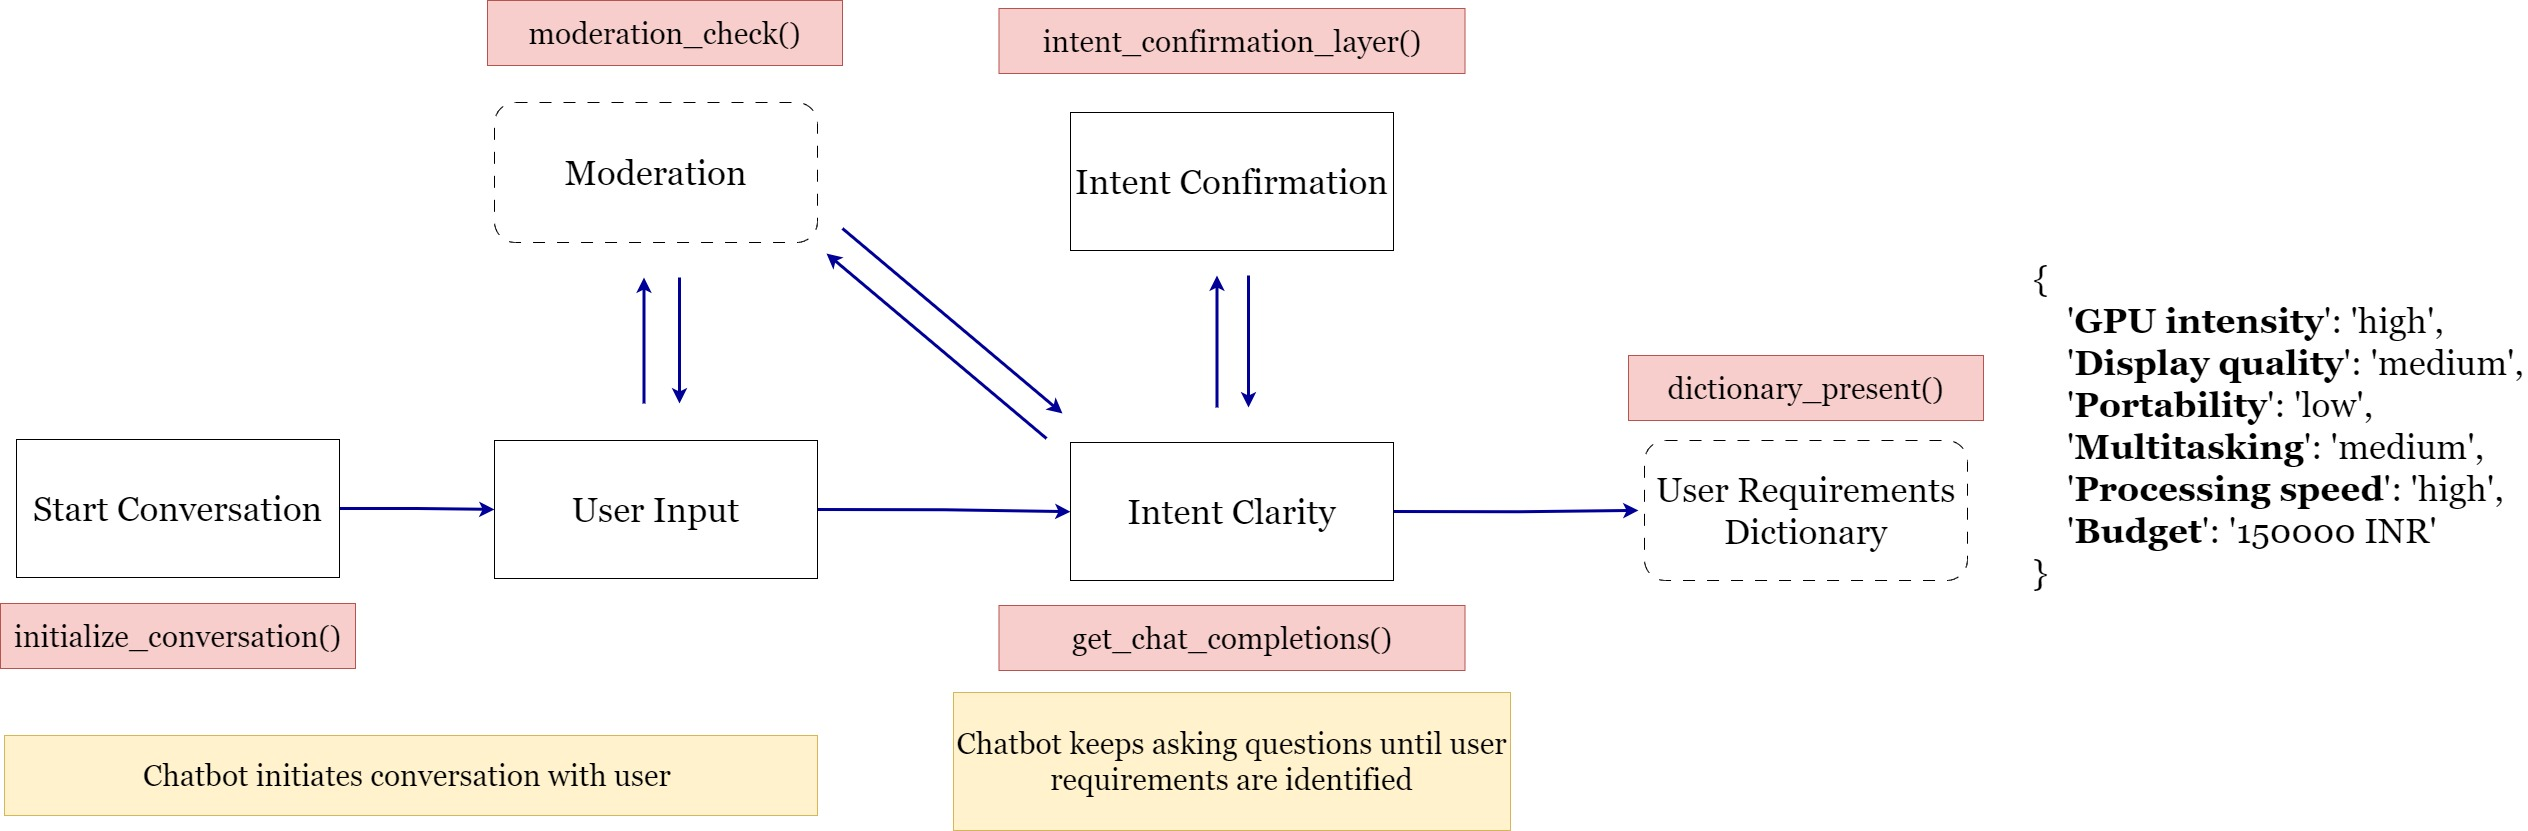

### 3.1 - Import the libraries

Let's start by importing the libraries that we'll require for this project. Following are the ones:
- openai
- pandas
- os, json, ast

Make sure the api key is stored in the text file `OPENAI_API_Key.txt`.

In [19]:
# Import the libraries
import os, json, ast
import openai
from tenacity import retry, wait_random_exponential, stop_after_attempt

In [20]:
# # If you're using the default OpenAI API key, uncomment the following lines:
openai.api_key = open("OPENAI_API_Key.txt", "r").read().strip()
os.environ['OPENAI_API_KEY'] = openai.api_key

In [21]:
# # Recall that messages to the LLM is a list of dicts containing system_message, user_input and assistant_message
# conversation = [{"role": "system", "content": system_message},
#                 {"role": "user", "content": user_input},
#                 {"role": "assistant", "content": assistant_message}]

### 3.2 - Implementing Intent Clarity and Intent Confirmation Layers

Let's start with the first part of the implementation - building the `intent clarity` and `intent confirmation` layers. As mentioned earlier, this layer helps in identifying the user requirements and passing it on to the product matching layer. Here are the functions that we would be using for building these layers:

- `initialize_conversation()`


### `initialize_conversation()`:
This initializes the variable conversation with the system message. Using prompt engineering and chain of thought reasoning, the function will enable the chatbot to keep asking questions until the user requirements have been captured in a dictionary. It also includes Few Shot Prompting(sample conversation between the user and assistant) to align the model about user and assistant responses at each step.



```
def initialize_conversation():
    '''
    Initializes a conversation for an intelligent laptop gadget expert system.

    Returns:
        list: [{"role": "system", "content": system_message}]
        A list containing a dictionary representing the system's initial message.
        
    The function initializes a conversation with the user, providing instructions, examples,
    and a sample conversation to guide the user in interacting with the system. The system's
    initial message includes information about the purpose of the conversation, instructions
    for filling in user profile details, guidelines for asking questions, and a sample
    conversation demonstrating how the interaction with the system progresses.

    The system expects the user to provide information related to their laptop requirements,
    including GPU intensity, display quality, portability, multitasking needs, processing
    speed, and budget. The provided information is used to update a predefined dictionary
    representing the user's profile. The system emphasizes extracting specific details from
    the user's responses to accurately fill in the dictionary values.

    The conversation flow involves three main thoughts:
    - Thought 1: Understanding the user's profile and filling confident values.
    - Thought 2: Filling values for remaining keys based on gathered information.
    - Thought 3: Confirming and verifying updated dictionary values.

    Users are encouraged to engage in a meaningful conversation with the system to ensure
    accurate profile representation and tailored recommendations for the best laptop choice.

    Usage:
        # Initialise the conversation
        conversation = initialize_conversation()
        # Print the conversation
        print(conversation)
    '''
    ```



In [22]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''
    delimiter = "######"

    example_user_req = {'GPU intensity': "_",
                        'Display quality': "_",
                        'Portability': "_",
                        'Multitasking': "_",
                        'Processing speed': "_",
                        'Budget': "_"}
    
    example_user_dict = {'GPU intensity': "high",
                        'Display quality':"high",
                        'Portability': "high",
                        'Multitasking': "high",
                        'Processing speed': "high",
                        'Budget': "70000"}

    data_dictionary = {
        'GPU intensity': ['low', 'medium', 'high'],
        'Display quality':"high",
        'Portability': ["low", "high"],
        'Multitasking': "high",
        'Processing speed': "high",
        'Budget': [10000, 500000]

    }
    
    system_message = f"""
    
    {delimiter}
    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. 
    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers 
    and note the details to map to a correct laptop nd suggest them.
    {delimiter}
    
    {delimiter}
    Here are few instructions that you need to follow
    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer's request.
    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.
    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should be filled with the 
    numerical value defined by the customer. You can refer to the "data_dictionary" for clear understanding.
    {delimiter}
    
    {delimiter}
    Follow the below chain of thoughts during the process
    Thought1: Start conversation with the user and understand the user's requirement. Update the dictionary based on the initial understanding.
    Thought2: Ask the questions to the user to fill in all the key values of the dictionary. Capture the key words from the user response and map properly to the keys in the dictionary.
    Thought3: If the response from the user is unclear, rephrase the question and try to capture the response of the user to map the values to the dictionary.
    
    {delimiter}Here is the example conversation between user and Assistant
    User: "Hi, I am a programmer"
    Assistant: "Hello, as a programmer you might want a system for multi-tasking and high processing power. What type of applications do you work on"
    User: "I work on IDEs like Eclipse, Anaconda, GitHub, JutyterLab and many other related softwares maily for coding and database administration"
    Assistant: "Would you also prefer a lightweight portable laptop?"
    User: "Yes, I would prefer to have a portable laptop as I work from home as well as a freelancer and need to carry it all the way home."
    Assistant: "Sure, that is noted. Also, what kind of diaply would you prefer?"
    User: "I prefer a 4k diaplay as I sometimes play games and also with a good graphic and memory should be great"
    Assistant: "Great, Thanks for the information. What range of budget are you looking for?"
    User: "Between 50000 to 70000 Rs"
    Assistant: " Sure, here is the requirements in short. {example_user_dict} "
    {delimiter}
    """
    conversation = [{"role": "system", "content": system_message}]

    return conversation

In [23]:
# Let's initialise conversation
debug_conversation = initialize_conversation()
print(debug_conversation[0]["content"])


    
    ######
    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. 
    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers 
    and note the details to map to a correct laptop nd suggest them.
    ######
    
    ######
    Here are few instructions that you need to follow
    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer's request.
    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.
    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should be filled with the 
    numerical value define

Let's now look at the next function.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant. We'll use the Chat Completions function for performing LLM calls to OpenAI.

### `get_chat_completions()`:

This function perform LLM call using the Chat Completions API to get the LLM response.

```
def get_chat_completions(input):
    """
    Generate chat completions using OpenAI's GPT-3.5-turbo model.

    Parameters:
    - input: list of dictionaries representing chat messages to prompt the model.
    - json_format: boolean, specifies whether the output should be in JSON format (default: False).

    Returns:
    - output: The generated chat completion response. If json_format is True, returns a JSON object.
    """
```

# Define a Chat Completions API call
# Retry up to 6 times with exponential backoff, starting at 1 second and maxing out at 20 seconds delay
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(6))
def get_chat_completions(input, json_format = False):
    """
    Generate chat completions using OpenAI's GPT-3.5-turbo model.

    Parameters:
    - input: list of dictionaries representing chat messages to prompt the model.
    - json_format: boolean, specifies whether the output should be in JSON format (default: False).

    # Explore OpenAI API for chat completion function

    # If json_format = True - handle this situation
    # If json_fomat = False - handle this situation

    Returns:
    - output: The generated chat completion response. If json_format is True, returns a JSON object.

In [19]:
!pip install openai==0.28.0

  Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.35.3
    Uninstalling openai-1.35.3:
      Successfully uninstalled openai-1.35.3


You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [24]:

##!pip install --upgrade openai
def get_chat_model_completions(messages):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
        max_tokens = 3000
    )
    return response.choices[0].message["content"]

### iterate_response() - Helper Function:
We've created a small helper test function to ensure the model's response is consistent.
Uncomment the code blocks and run the function `iterate_response(response)` to check if the response of the `intent_confirmation_layer`is consistent.}

def iterate_llm_response(funct, debug_response, num=10):
    """
    Calls a specified function repeatedly and prints the results.

    This function is designed to test the consistency of a response from a given function.
    It calls the function multiple times (default is 10) and prints out the iteration count,
    the function's response(s).

    Args:
        funct (function): The function to be tested. This function should accept a single argument
                          and return the response value(s).
        debug_response (dict): The input argument to be passed to 'funct' on each call.
        num (int, optional): The number of times 'funct' will be called. Defaults to 10.

    Returns:
        This function only returns the results to the console.

    Example usage: Test the consistency of responses from 'intent_confirmation_layer' function
    iterate_llm_response(get_chat_completions, messages)
    """


Let's pass the initialized conversation `debug_conversation` and see what is the assistant's response.

In [25]:
debug_user_input = "Hi, I am Anand. I need a laptop for coding."

In [26]:
debug_conversation.append({"role": "user", "content": debug_user_input})
print(debug_conversation[0]["content"]) # System Message
print(debug_conversation[1]["content"]) # User Input


    
    ######
    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. 
    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers 
    and note the details to map to a correct laptop nd suggest them.
    ######
    
    ######
    Here are few instructions that you need to follow
    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer's request.
    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.
    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should be filled with the 
    numerical value define

In [27]:
# Let's look at the debug_conversation list
display(debug_conversation)

[{'role': 'system',
  'content': '\n    \n    ######\n    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. \n    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers \n    and note the details to map to a correct laptop nd suggest them.\n    ######\n    \n    ######\n    Here are few instructions that you need to follow\n    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer\'s request.\n    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.\n    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should

In [28]:
# Getting the response from the LLM Assistant by passing the conversation to the Chat Completions API
debug_response_assistant = get_chat_model_completions(debug_conversation)
display(debug_response_assistant)

'Hello Anand, as a coder you might want a system with high processing power and multitasking capabilities. What type of coding do you mainly work on?'

Let's play around a bit and add the following user's input `debug_user_input` to the conversation `debug_conversation` and see what the assistant responds with.

In [29]:
# Let's append this to the conversation list
debug_conversation.append(({"role": "system", "content": debug_response_assistant}))
debug_conversation

[{'role': 'system',
  'content': '\n    \n    ######\n    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. \n    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers \n    and note the details to map to a correct laptop nd suggest them.\n    ######\n    \n    ######\n    Here are few instructions that you need to follow\n    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer\'s request.\n    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.\n    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should

Typically, whenever the chatbot is interacting with the user, all the conversations should be moderated to identify any inappropriate content. Let's look at the function that can help with it.

### `moderation_check()`:
 This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

# Define a function called moderation_check that takes user_input as a parameter.
def moderation_check(user_input):
    """
    Perform moderation check on user input using the OpenAI API.

    Parameters:
    - user_input (str): The text input to be checked for moderation.

    Returns:
    - str: "Flagged" if the input is flagged by the moderation system,
           "Not Flagged" otherwise.
    """
    # Call the OpenAI API to perform moderation on the user's input.
    # OpenAI moderation function -> results -> flagged -> True/False

    # Extract the moderation result from the API response.

    # Check if the input was flagged by the moderation system. If flagged, return "Flagged" else return "Not Flagged"

In [30]:
def moderation_check(user_input):
    response = openai.Moderation.create(input=user_input)
    moderation_output = response["results"][0]
    if moderation_output["flagged"] == True:
        return "Flagged"
    else:
        return "Not Flagged"

In [32]:
moderation_check("I want to kill")

'Flagged'

Let's test moderation on the `debug_user_input`

In [33]:
debug_moderation = moderation_check(debug_user_input)
print(debug_moderation)

Not Flagged


Let's now test moderation on some other text.

In [34]:
print(moderation_check("I want to kill Ravan."))
print(moderation_check("I need a laptop"))

Flagged
Not Flagged


So, this moderation api may not be perfect but if you ask this to the ChatGPT or it's API (GPT 3.5), it'll not help you with such requests. Remember, moderation should also be applied on the GPT 3.5's output.

Let's now check moderation on the assistant's response `debug_response_assistant`.

In [35]:
moderation_check(debug_response_assistant)

'Not Flagged'

As mentioned earlier, you need to understand the user's profile, which essentially means that all the features: GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget are captured or not. Let's look at the function that helps us verify that.

### `intent_confirmation_layer()`:

This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
   - GPU intensity
   - Display quality
   - Portability
   - Multitasking
   - Processing speed
   - Budget



```
def intent_confirmation_layer(response_assistant):
    """
    This function serves as an intent confirmation layer for a laptop recommendation system using OpenAI LLM API.

    Parameters:
    - response_assistant (str): The input text containing user requirements captured through 6 keys:
        'GPU intensity', 'Display quality', 'Portability', 'Multitasking', 'Processing speed', and 'Budget'.

    Returns:
    - str: A one-word string in JSON format indicating if the values for the specified keys are correctly filled.
        - 'Yes' if the values are correctly filled for all keys ('GPU intensity', 'Display quality', 'Portability',
          'Multitasking', 'Processing speed') based on the importance as stated by the user.
        - 'No' otherwise.

    Note:
    - The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on their importance as stated by the user.
    - The input text should be structured such that it contains the necessary keys and their corresponding values.
    - The function uses OpenAI's Chat Completion API to evaluate the correctness of the input values.
    """
```



def intent_confirmation_layer(response_assistant):
    delimiter = '####'

    {delimiter}
    prompt = f"""
    You are an expert evaluater and has a very good attention to detail. You have to check if the fields 'GPU intensity','Display quality','Portability','Multitasking','Processing speed'and
    'Budget' are filled. All fields except 'Budget' must strictly have either of the values 'Low' or 'Medium' or 'High' and 'Budget' with the numerical value suggested by the user.
    If all the fields are correctly filled output "Yes" else output "No". The output should be strictly "Yes" or "No" based on condition and nothing else is allowed.
    """
    {delimiter}

    {delimiter}
    f""" Below is the Example:
    >>> input_text = "{'GPU intensity': 'high', 'Display quality': 'medium', 'Portability': 'low',
                      'Multitasking': 'medium', 'Processing speed': 'high', 'Budget': 1200}"
    >>> intent_confirmation_layer(input_text)
    {'result': 'Yes'}
    """
    {delimiter}
    confirmation = openai.Completion.create(
                                    model="gpt-3.5-turbo",
                                    prompt = prompt,
                                    temperature=0)


    return confirmation["choices"][0]["text"]


In [64]:
def intent_confirmation_layer(response_assistant):
    prompt = f"""
    You are an AI assistant helping to confirm user intents based on given responses. Please analyze the following response from the user and confirm if their intent matches the expected criteria.

    Response: {response_assistant}

    Criteria: The response should match the following criteria to confirm the intent.
    - Clearly indicates high GPU intensity
    - Specifies a medium display quality
    - Indicates low portability
    - Mentions medium multitasking capability
    - Highlights high processing speed
    - Budget is provided

    Please respond with "Yes" if the criteria are met, otherwise respond with "No".

    ```Example:
    >>> input_text = {{'GPU intensity': 'high', 'Display quality': 'medium', 'Portability': 'low', 'Multitasking': 'medium', 'Processing speed': 'high', 'Budget': 1200}}
    >>> intent_confirmation_layer(input_text)
    {{'result': 'Yes'}}
    ```
    """

    try:
        completion = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are an AI assistant."},
                {"role": "user", "content": prompt}
            ]
        )
        result_text = completion.choices[0].message["content"].strip()
        return {"result": result_text, "reason": "Successfully analyzed the response"}
    except Exception as e:
        print(f"Error in intent_confirmation_layer: {e}")
        return {"result": "Error", "reason": str(e)}


In [57]:
# Here are some sample input output pairs for better understanding:
# {delimiter}
# input: "{{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'low'}}"
# output: No

# input: "{{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': '', 'Budget': '90000'}}"
# output: No

# input: "Here is your user profile 'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'low','Processing speed': 'high','Budget': '200000'"
# output: Yes

# input: "Here is your recommendation {{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'low', 'Budget': '90000'}}"
# output: Yes

# input: "Here is your recommendation - 'GPU intensity': 'high' - 'Display quality': 'low' - 'Portability': 'low'  - 'Multitasking': 'high' - 'Processing speed': 'high' - 'Budget': '90000' "
# output: Yes

# input: "You can look at this - GPU intensity: high - Display quality: low - Portability: low  - Multitasking: high - Processing speed: high - Budget: 90000"
# output: Yes

# input: "{{GPU intensity: low, Display quality: high, Portability: low, Multitasking:high,Processing speed: Low, Budget: 70000}}"
# output: No

# {delimiter}

Let's apply the function to the assistant's reponse and see if it has captured the user profile.

In [65]:
debug_response_assistant

'Hello Anand, as a coder you might want a system with high processing power and multitasking capabilities. What type of coding do you mainly work on?'

In [66]:
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
display(debug_confirmation)

{'result': 'No', 'reason': 'Successfully analyzed the response'}

In [67]:
# Printing the value for better clarity
print("Result:",debug_confirmation.get('result'),"\t", "Reason:", debug_confirmation.get('reason'))

Result: No 	 Reason: Successfully analyzed the response


Now, you can keep adding user and assistant responses to debug_conversation and get to a point where intent_confirmation_layer() gives yes as a response. Let's see if the following response by the assistant passes the intent_confirmation_layer() test.

In [68]:
#Let's add the above assistant response to the debug_conversation.
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})

In [69]:
debug_conversation

[{'role': 'system',
  'content': '\n    \n    ######\n    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. \n    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers \n    and note the details to map to a correct laptop nd suggest them.\n    ######\n    \n    ######\n    Here are few instructions that you need to follow\n    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer\'s request.\n    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.\n    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should

Let's say that after a series of conversations you get the following response from the assistant.

In [70]:
# Example 1 - Let's check with the confirmation_layer if all the keys are present
debug_response_assistant_1 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_1)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}



Do you think it'll pass the `intent_confirmation_layer()` test?

 Let's try it out.

In [71]:
response = intent_confirmation_layer(debug_response_assistant_1)
response.get('result') # Extract the result key from the dictionary

'No'

In [72]:
# Example 2 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_2 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_2)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}



In [73]:
intent_confirmation_layer(debug_response_assistant_2)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_2)

{'result': 'No', 'reason': 'Successfully analyzed the response'}

In [74]:
# Example 3 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_3 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_3)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}



In [75]:
intent_confirmation_layer(debug_response_assistant_3)

{'result': 'No', 'reason': 'Successfully analyzed the response'}

Let's now look at the working of `dictionary_present()`.

In [76]:
# Let's check the consistency of the output responses
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_3)

### `dictionary_present()`:

This function checks if the final understanding of user's profile is returned by the chatbot is a Python dictionary or not. This is important as it'll be used later on for finding the right laptops using dictionary matching.

def dictionary_present(response):
    """
    Extracts and returns a Python dictionary in JSON format from the given input string if it matches a specific format.
    Args:
    - response (str): A string containing the user input or a Python dictionary in a specific format.

    Returns:
    - dict: The extracted Python dictionary in JSON format if found, otherwise returns None.

    The input string is expected to contain a Python dictionary in the following format:
    {'GPU intensity': 'low/ medium/ high',
    'Display quality': 'low/ medium/ high',
    'Portability': 'low/ medium/ high',
    'Multitasking': 'low/ medium/ high',
    'Processing speed': 'low/ medium/ high',
    'Budget': 'Budget in numerical value'}

    The function extracts the relevant values from the input and returns only the Python dictionary in JSON format. The output must match the format described above.

    Example:
    input = "Here is your user profile \
    'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'high','Processing speed': 'high','Budget': '200000 INR'"
    >>> dictionary_present(response)
    '{"GPU intensity": "high","Display quality": "high","Portability": "medium","Multitasking": "high","Processing speed": "high","Budget": "200000"}'

    NOTE: The function internally uses get_chat_completions() to interact with the user in a chat-like manner.
    """

In [80]:
def dictionary_present(response):
    delimiter = "####"
    user_req = {'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '50000'}

    prompt = f"""
             You are an expert programmer and aware python very well. You have to convert the values provided by the user to the dictionary.
             The dictionary must be in the following format : {user_req}
             Below are a few examples of how the dictionary look like

             {delimiter}
             input: - GPU intensity: low - Display quality: high - Portability: low - Multitasking: high - Processing speed: medium - Budget: 50,000 INR
             output: {{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '50000'}}

             input: {{'GPU intensity':     'low', 'Display quality':     'high', 'Portability':    'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '90,000'}}
             output: {{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '90000'}}

             input: Here is your user profile 'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'low','Processing speed': 'high','Budget': '200000 INR'
             output: {{'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'high','Processing speed': 'low','Budget': '200000'}}
            {delimiter}
            """
    messages = [{"role": "system", "content":prompt },
                {"role": "user", "content":f"""Here is the user input: {response}""" }]

    confirmation = get_chat_model_completions(messages)

    return confirmation

Let's start by passing the `debug_response_assistant`.

In [81]:
debug_response_assistant_n = """
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}
"""

In [82]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

"{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'low', 'Processing speed': 'low', 'Budget': '50000'}"

In [83]:
type(response_dict_n)

str

What if you pass something like this where it is not in the form of a dictionary? Or some key or some values are missing? Let's see.

In [84]:
debug_response_assistant_n = f"""Thank you for providing your budget.
Based on your budget of 50,000 INR, I will consider this while recommending suitable laptop options for you.
Here is the final recommendation for your laptop:
- GPU intensity: high
- Display quality: high
- Portability: low
- Multitasking: high
- Processing speed: medium
- Budget: 80,000 INR

Please note that these specifications are based on your requirements for surfing and a decent display within your budget.
Let me know if there's anything else I can assist you with!"""

In [85]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

"{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}"

In [86]:
type(response_dict_n)

str

In [87]:
# Check for LLM function's consistency
##iterate_llm_response(dictionary_present, debug_response_assistant_n)

Let's quickly take a look at the code that we have run until now.

In [88]:
debug_conversation

[{'role': 'system',
  'content': '\n    \n    ######\n    You are an electronic gadgets expert and you are well trained to understand the features, types and varients of Laptops with different laptop providers. \n    Your main goal is to suggest a proper laptop to the costomers based on the reuirements you are being provided. You also ask relevant questions to the customers \n    and note the details to map to a correct laptop nd suggest them.\n    ######\n    \n    ######\n    Here are few instructions that you need to follow\n    1) You have to collect the information from the customer and update the dictionary "example_user_req". Everything should be clearly updated as per customer\'s request.\n    2) you can use the example dictionary "example_user_dict" and update the dictionary for different users in a similar manner.\n    3) All the keys should have the values between "High" and "low" except "GPU intensity" key which accepts values "High","Medium" and "Low" and Budget key should

In [89]:
debug_conversation = initialize_conversation()
debug_user_input = "Hi, I am Anand. I need a laptop for coding."
debug_moderation = moderation_check(debug_user_input)
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_model_completions(debug_conversation)
debug_moderation = moderation_check(debug_response_assistant)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
# After a series of conversation...
response_dict_n = dictionary_present(debug_response_assistant_n)
print(response_dict_n)

{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}


So, now that you have the user profile stored in `response_dict_n`. We'll use this to generate recommendations. Before that, we need to create a similar profile for every laptop. Let's see how we do it.

## Stage 2

[Stage 2 Flowchart](https://cdn.upgrad.com/uploads/production/c71aa254-32db-4265-a083-f4a540dac014/Stage+2.jpg)

### 3.3 Implementing the Product Mapping and Information Extraction Layers

In this section, we take in the output of the previous layers, i.e. the user requirements, which is in the format of a Python dictionary.
<br>
Next we will extract the top 3 laptop recommendations based on user's requirements.

This stage consists of the following helper functions that will implement the information extraction and product matching layers.

### `product_map_layer()`:

This function is responsible for extracting key features and criteria from laptop descriptions. Here's a breakdown of how it works:

-  Use a prompt that assign it the role of a Laptop Specifications Classifier, whose objective is to extract key features and classify them based on laptop descriptions.

- Provide step-by-step instructions for extracting laptop features from description.

- Assign specific rules for each feature (e.g., GPU Intensity, Display Quality, Portability, Multitasking, Processing Speed) and associate them with the appropriate classification value (Low, Medium, or High).

- Includes Few Shot Prompting (sample conversation between the user and assistant) to demonstrate the expected result of the feature extraction and classification process.

def product_map_layer(laptop_description):
    """
    Extracts key features from a laptop description and classifies them based on predefined rules.

    Args:
        laptop_description (str): The description of the laptop to be analyzed.

    Returns:
        dict: A dictionary containing the classified features of the laptop.
            Keys represent different aspects such as GPU intensity, Display quality, Portability,
            Multitasking, and Processing speed, each mapped to a value indicating the classification
            (low, medium, or high) based on the extracted features.
    """

In [102]:
def product_map_layer(laptop_description):
    delimiter = "#####"
    lap_spec = {
      "GPU intensity":"(Type of the Graphics Processor)",
      "Display quality":"(Display Type, Screen Resolution, Display Size)",
      "Portability":"(Laptop Weight)",
      "Multitasking":"(RAM Size)",
      "Processing speed":"(CPU Type, Core, Clock Speed)"
  }

    values = {'low','medium','high'}

    prompt = f"""

    You are a Laptop Specifications Classifier whose job is to extract the key features of laptops as per their requirements.
   To analyze each laptop, perform the following steps:
   Step 1: Extract the laptop's primary features from the description {laptop_description}
   Step 2: Store the extracted features in {lap_spec} \
   Step 3: Classify each of the items in {lap_spec}into {values} based on the following rules: \
   {delimiter}
   GPU Intensity: low: < for Integrated graphics or entry-level dedicated graphics like Intel UHD > , \n
   medium: < if Mid-range dedicated graphics like M1, AMD Radeon, Intel Iris > , \n
   high: < High-end dedicated graphics like Nvidia > , \n

   Display Quality: low: < if resolution below Full HD (e.g., 1366x768). > , \n
   medium: < if Full HD resolution (1920x1080) or higher. > , \n
   high: < if High-resolution display (e.g., 4K, Retina) with excellent color accuracy and features like HDR support. > \n

   Portability: low: < if laptop weight is less than 1.51 kg > , \n
   medium: < if laptop weight is between 1.51 kg and 2.51 kg> , \n
   high: <if laptop weight is greater than 2.51 kg> \n

   Multitasking: low: < If RAM size is 8GB, 12GB > , \n
   medium: < if RAM size is 16GB > , \n
   high: < if RAM size is 32GB, 64GB> \n

   Processing Speed: low: < if entry-level processors like Intel Core i3, AMD Ryzen 3> , \n
   medium: < if Mid-range processors like Intel Core i5, AMD Ryzen 5 > , \n
   high: < if High-performance processors like Intel Core i7, AMD Ryzen 7 or higher > \n
   {delimiter}

   {delimiter}
   Here are some input output pairs for few-shot learning:
   input1: "The Dell Inspiron is a versatile laptop that combines powerful performance and affordability. It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing. With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity. The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience. Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage. Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience. With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment. All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users."
   output1: {{'GPU intensity': 'medium','Display quality':'medium','Portability':'medium','Multitasking':'high','Processing speed':'medium'}}

   input2: "The Lenovo ThinkPad X1 Carbon is a sleek and lightweight laptop designed for professionals on the go. It is equipped with an Intel Core i7 processor running at 2.6 GHz, providing strong processing capabilities for multitasking and productivity. With 16GB of RAM and an SSD, it offers fast and efficient performance along with ample storage capacity. The laptop features a 14" IPS display with a resolution of 2560x1440, delivering sharp visuals and accurate colors. It comes with Intel UHD integrated graphics for decent graphical performance. Weighing just 1.13 kg, it is extremely lightweight and highly portable. The laptop features an IR camera for face unlock, providing convenient and secure login options. With a three-year warranty and an impressive battery life of up to 12 hours, the Lenovo ThinkPad X1 Carbon ensures reliability and long-lasting productivity. Priced at 130,000, it offers top-notch performance and portability for professionals."
   output2: {{'GPU intensity': 'medium', 'Display quality': 'high', 'Portability': 'high', 'Multitasking':'high', 'Processing speed':'high'}}

   input3: "The Apple MacBook Pro is a high-end laptop that combines top-tier performance with a stunning display. It is equipped with an Intel Core i9 processor running at 2.9 GHz, providing exceptional processing power for demanding tasks and content creation. With 32GB of RAM and an SSD, it offers seamless multitasking and fast storage access for large projects. The laptop features a 16" Retina display with a resolution of 3072x1920, delivering breathtaking visuals and precise color reproduction. It comes with an AMD Radeon graphics card, ensuring smooth graphics performance for professional applications. Weighing 2.02 kg, it is relatively lightweight for its size. The laptop features a True Tone display, adjusting the color temperature to match the ambient lighting for a more natural viewing experience. With a three-year warranty and a battery life of up to 10 hours, the Apple MacBook Pro offers reliability and endurance for professionals. Priced at 280,000, it caters to users who require uncompromising performance and a superior display for their demanding workloads."
   output3: {{'GPU intensity': 'medium', 'Display quality': 'high', 'Portability': 'medium','Multitasking': 'high', 'Processing speed': 'high'}}
   {delimiter}

   Follow the above instructions step-by-step and output the dictionary {lap_spec} for the following laptop {laptop_description}.
  """


##response = openai.Completion.create(
    ##model="gpt-3.5-turbo",
    ##prompt=prompt ,
    #max_tokens = 2000,
    # temperature=0.3,
    # top_p=0.4
    #)
##return response["choices"][0]["text"]

    messages = [
        {"role": "system", "content": "You are an AI assistant."},
        {"role": "user", "content": prompt}
    ]

    try:
        completion = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=50,
        )
        result_text = completion.choices[0].message["content"].strip()
        return {"result": result_text, "reason": "Successfully analyzed the response"}
    except Exception as e:
        print(f"Error in intent_confirmation_layer: {e}")
        return {"result": "Error", "reason": str(e)}

Let's test this for one sample laptop description.

In [103]:
laptop_description_1 = f"""
The Dell Inspiron is a versatile laptop that combines powerful performance and affordability.
It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing.
With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity.
The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience.
Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage.
Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience.
With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment.
All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users.
"""

In [104]:
display(product_map_layer(laptop_description_1))

{'result': "Based on the specifications provided for the Dell Inspiron laptop, here are the extracted features classified into the specified categories:\n\n```\n{\n    'GPU intensity': 'medium',\n    'Display quality': 'medium',\n    'Portability': 'medium',",
 'reason': 'Successfully analyzed the response'}

In [105]:
# # Data type of the output response
print(type(product_map_layer(laptop_description_1)))

<class 'dict'>


In [106]:
# # Check for consistency with iterate_response function
##iterate_llm_response(product_map_layer, laptop_description_1)

Let's now apply this function to the entire laptop dataset

In [107]:
##Run this code once to extract product info in the form of a dictionary
laptop_df= pd.read_csv('laptop_data.csv')

## Create a new column "laptop_feature" that contains the dictionary of the product features
laptop_df['laptop_feature'] = laptop_df['Description'].apply(lambda x: product_map_layer(x))

In [108]:
laptop_df.to_csv("updated_laptop.csv",index=False,header = True)

In [109]:
import ast
import re

def extract_dictionary_from_string(string):
    regex_pattern = r"\{[^{}]+\}"

    dictionary_matches = re.findall(regex_pattern, string)

    # Extract the first dictionary match and convert it to lowercase
    if dictionary_matches:
        dictionary_string = dictionary_matches[0]
        dictionary_string = dictionary_string.lower()

        # Convert the dictionary string to a dictionary object using ast.literal_eval()
        dictionary = ast.literal_eval(dictionary_string)
    return dictionary

In [110]:
string = " \n \t           Output: {{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '50000'}}ad"
extracted_dict = extract_dictionary_from_string(string)
print(extracted_dict )

{'gpu intensity': 'high', 'display quality': 'high', 'portability': 'low', 'multitasking': 'high', 'processing speed': 'medium', 'budget': '50000'}


### `compare_laptops_with_user()`:

This function compares the user's profile with the different laptops and come back with the top  recommendations. It will perform the following steps:
    - It will take the user requirements dictionary as input
    - Filter the laptops based on their price, keeping only the ones within the user's budget.
    - Calculate a score for each laptop based on how well it matches the user's requirements.
    - Sort the laptops based on their scores in descending order.
    - Return the top 3 laptops as a JSON-formatted string.

def compare_laptops_with_user(user_req_string):
    """
    Compares laptops based on user requirements and returns the top 3 matching laptops in JSON format.

    Parameters:
    - user_req_string (str): A string representing user requirements in JSON format.

    Returns:
    - str: A JSON string containing information about the top 3 matching laptops based on user requirements.
    """

def compare_laptops_with_user(user_req_string):
    laptop_df= pd.read_csv('updated_laptop.csv')
    user_requirements = extract_dictionary_from_string(user_req_string)
    budget = int(user_requirements.get('budget', '0').replace(',', '').split()[0])
    #This line retrieves the value associated with the key 'budget' from the user_requirements dictionary.
    #If the key is not found, the default value '0' is used.
    #The value is then processed to remove commas, split it into a list of strings, and take the first element of the list.
    #Finally, the resulting value is converted to an integer and assigned to the variable budget.


    filtered_laptops = laptop_df.copy()
    filtered_laptops['Price'] = filtered_laptops['Price'].str.replace(',','').astype(int)
    filtered_laptops = filtered_laptops[filtered_laptops['Price'] <= budget].copy()
    #These lines create a copy of the laptop_df DataFrame and assign it to filtered_laptops.
    #They then modify the 'Price' column in filtered_laptops by removing commas and converting the values to integers.
    #Finally, they filter filtered_laptops to include only rows where the 'Price' is less than or equal to the budget.

    mappings = {
        'low': 0,
        'medium': 1,
        'high': 2
    }
    # Create 'Score' column in the DataFrame and initialize to 0
    filtered_laptops['Score'] = 0
    for index, row in filtered_laptops.iterrows():
        user_product_match_str = row['laptop_feature']
        laptop_values = extract_dictionary_from_string(user_product_match_str)
        score = 0

        for key, user_value in user_requirements.items():
            if key.lower() == 'budget':
                continue  # Skip budget comparison
            laptop_value = laptop_values.get(key, None)
            laptop_mapping = mappings.get(laptop_value.lower(), -1)
            user_mapping = mappings.get(user_value.lower(), -1)
            if laptop_mapping >= user_mapping:
                ### If the laptop value is greater than or equal to the user value the score is incremented by 1
                score += 1

        filtered_laptops.loc[index, 'Score'] = score

    # Sort the laptops by score in descending order and return the top 5 products
    top_laptops = filtered_laptops.drop('laptop_feature', axis=1)
    top_laptops = top_laptops.sort_values('Score', ascending=False).head(3)

    return top_laptops.to_json(orient='records')

In [128]:
def compare_laptops_with_user(user_req_string):
    user_values = extract_dictionary_from_string(user_req_string)
    print("user_values:", user_values)  # Debug print
    if not user_values:
        print("Error: Could not extract user values")
        return None

    # Mock list of laptops for comparison
    laptops = [
        {"name": "Laptop A", "GPU intensity": "high", "Display quality": "medium", "Portability": "medium", "Multitasking": "high", "Processing speed": "high"},
        {"name": "Laptop B", "GPU intensity": "medium", "Display quality": "high", "Portability": "low", "Multitasking": "medium", "Processing speed": "medium"},
        {"name": "Laptop C", "GPU intensity": "low", "Display quality": "medium", "Portability": "high", "Multitasking": "medium", "Processing speed": "low"},
    ]

    mappings = {
        "high": 3,
        "medium": 2,
        "low": 1,
    }

    best_match_score = -1
    best_match_laptops = []

    for laptop in laptops:
        laptop_values = extract_dictionary_from_string(str(laptop))
        print("laptop_values:", laptop_values)  # Debug print
        if not laptop_values:
            print(f"Error: Could not extract laptop values for {laptop['name']}")
            continue
        
        score = 0
        for key, user_value in user_values.items():
            if key.lower() == 'budget':
                continue  # Skip budget comparison
            laptop_value = laptop_values.get(key, None)
            laptop_mapping = mappings.get(laptop_value.lower(), -1)
            user_mapping = mappings.get(user_value.lower(), -1)
            score += abs(laptop_mapping - user_mapping)
        
        if score > best_match_score:
            best_match_score = score
            best_match_laptops = [laptop]
        elif score == best_match_score:
            best_match_laptops.append(laptop)
    
    return best_match_laptops

# Example usage
response_dict_n = "{\n    'GPU intensity': 'medium',\n    'Display quality': 'medium',\n    'Portability': 'medium',\n    'Multitasking': 'high',\n    'Processing speed': 'medium'\n}"
top_3_laptops = compare_laptops_with_user(response_dict_n)
print("top_3_laptops:", top_3_laptops)

user_values: {'gpu intensity': 'medium', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'high', 'processing speed': 'medium'}
laptop_values: {'name': 'laptop a', 'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'high', 'processing speed': 'high'}
laptop_values: {'name': 'laptop b', 'gpu intensity': 'medium', 'display quality': 'high', 'portability': 'low', 'multitasking': 'medium', 'processing speed': 'medium'}
laptop_values: {'name': 'laptop c', 'gpu intensity': 'low', 'display quality': 'medium', 'portability': 'high', 'multitasking': 'medium', 'processing speed': 'low'}
top_3_laptops: [{'name': 'Laptop C', 'GPU intensity': 'low', 'Display quality': 'medium', 'Portability': 'high', 'Multitasking': 'medium', 'Processing speed': 'low'}]


Now that you have the `compare_laptops_with_user()` function ready, let's pass the `response_dict_n` to the function to get top 3 recommendation.

In [129]:
display(response_dict_n, '\n',type(response_dict_n))

"{\n    'GPU intensity': 'medium',\n    'Display quality': 'medium',\n    'Portability': 'medium',\n    'Multitasking': 'high',\n    'Processing speed': 'medium'\n}"

'\n'

str

In [130]:
dictionary_present(response_dict_n)

"{'GPU intensity': 'medium', 'Display quality': 'medium', 'Portability': 'medium', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '50000'}"

In [131]:
top_3_laptops = compare_laptops_with_user(response_dict_n)

display(top_3_laptops)

user_values: {'gpu intensity': 'medium', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'high', 'processing speed': 'medium'}
laptop_values: {'name': 'laptop a', 'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'high', 'processing speed': 'high'}
laptop_values: {'name': 'laptop b', 'gpu intensity': 'medium', 'display quality': 'high', 'portability': 'low', 'multitasking': 'medium', 'processing speed': 'medium'}
laptop_values: {'name': 'laptop c', 'gpu intensity': 'low', 'display quality': 'medium', 'portability': 'high', 'multitasking': 'medium', 'processing speed': 'low'}


[{'name': 'Laptop C',
  'GPU intensity': 'low',
  'Display quality': 'medium',
  'Portability': 'high',
  'Multitasking': 'medium',
  'Processing speed': 'low'}]

### `product_validation_layer()`:

This function verifies that the laptop recommendations are good enough, has score greater than 2, and matches the user's requirements.

def recommendation_validation(laptop_recommendation):
    """
    Validate a list of laptop recommendations based on a score threshold.

    Parameters:
    - laptop_recommendation (str): JSON string containing a list of laptop recommendations,
      each with a 'Score' key representing its rating.

    Returns:
    - list: A filtered list of laptop recommendations where each item has a 'Score' greater than 2.
    """

In [134]:
def recommendation_validation(laptop_recommendation):
    if not isinstance(laptop_recommendation, list):
        print("Error: Expected a list of laptop recommendations")
        return []

    data1 = []
    for laptop in laptop_recommendation:
        if isinstance(laptop, dict):
            data1.append(laptop)
        else:
            print(f"Error: Invalid laptop recommendation format: {laptop}")

    return data1

In [135]:
validated_data = recommendation_validation(top_3_laptops)
print(validated_data)

[{'name': 'Laptop C', 'GPU intensity': 'low', 'Display quality': 'medium', 'Portability': 'high', 'Multitasking': 'medium', 'Processing speed': 'low'}]


Now that you the top 3 laptops extracted, let's pass it to the recommendation layer that'll send it to the user and the user can ask questions around it.

Product Recommendation Layer
Finally, we come to the product recommendation layer. It takes the output from the compare_laptops_with_user function in the previous layer and provides the recommendations to the user. It has the following steps.

Initialize the conversation for recommendation.
Generate the recommendations and display in a presentable format.
Ask questions basis the recommendations.

In [136]:
def initialize_conv_reco(products):
    system_message = f"""
    You are an intelligent laptop gadget expert and you are tasked with the objective to \
    solve the user queries about any product from the catalogue: {products}.\
    You should keep the user profile in mind while answering the questions.\

    Start with a brief summary of each laptop in the following format, in decreasing order of price of laptops:
    1. <Laptop Name> : <Major specifications of the laptop>, <Price in Rs>
    2. <Laptop Name> : <Major specifications of the laptop>, <Price in Rs>

    """
    conversation = [{"role": "system", "content": system_message }]
    return conversation

In [137]:
debug_conversation_reco = initialize_conv_reco(top_3_laptops)

In [138]:
debug_recommendation = get_chat_model_completions(debug_conversation_reco)
print(debug_recommendation + '\n')

Sure, here is a brief summary of the laptops available in the catalogue:

1. Laptop C: GPU intensity - low, Display quality - medium, Portability - high, Multitasking - medium, Processing speed - low, Price: Rs. <price>

Now, please let me know if you have any specific questions or if you need help in choosing a laptop based on your requirements.



In [139]:
debug_conversation_reco.append({"role": "user", "content": "This is my user profile" + response_dict_n})
debug_conversation_reco.append({"role": "assistant", "content": debug_recommendation})

In [140]:
debug_user_input = "Which laptop is ideal for multitasking?"

In [141]:
debug_conversation_reco.append({"role": "user", "content": debug_user_input})
debug_response_asst_reco = get_chat_model_completions(debug_conversation_reco)
print('\n' + debug_response_asst_reco + '\n')


Based on your user profile where you prioritize high multitasking capabilities, the ideal laptop for you from the catalogue would be Laptop C. It has a Multitasking rating of medium, which aligns with your requirement for high multitasking capabilities.



## Dialogue Management System
Bringing everything together, we create a diagloue_mgmt_system() function that contains the logic of how the different layers would interact with each other. This will be the function that we'll call to initiate the chatbot

In [142]:
def dialogue_mgmt_system():
    conversation = initialize_conversation()
    introduction = get_chat_model_completions(conversation)
    print(introduction + '\n')
    top_3_laptops = None
    user_input = ''

    while(user_input != "exit"):
        user_input = input("")

        moderation = moderation_check(user_input)
        if moderation == 'Flagged':
            print("Sorry, this message has been flagged. Please restart your conversation.")
            break

        if top_3_laptops is None:
            conversation.append({"role": "user", "content": user_input})

            response_assistant = get_chat_model_completions(conversation)

            moderation = moderation_check(response_assistant)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            confirmation = intent_confirmation_layer(response_assistant)

            moderation = moderation_check(confirmation)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            if "No" in confirmation:
                conversation.append({"role": "assistant", "content": response_assistant})
                print("\n" + response_assistant + "\n")
                print('\n' + confirmation + '\n')
            else:
                print("\n" + response_assistant + "\n")
                print('\n' + confirmation + '\n')
                response = dictionary_present(response_assistant)

                moderation = moderation_check(response)
                if moderation == 'Flagged':
                    print("Sorry, this message has been flagged. Please restart your conversation.")
                    break

                print('\n' + response + '\n')
                print("Thank you for providing all the information. Kindly wait, while I fetch the products: \n")
                top_3_laptops = compare_laptops_with_user(response)

                validated_reco = recommendation_validation(top_3_laptops)

                if len(validated_reco) == 0:
                    print("Sorry, we do not have laptops that match your requirements. Connecting you to a human expert.")
                    break

                conversation_reco = initialize_conv_reco(validated_reco)
                recommendation = get_chat_model_completions(conversation_reco)

                moderation = moderation_check(recommendation)
                if moderation == 'Flagged':
                    print("Sorry, this message has been flagged. Please restart your conversation.")
                    break

                conversation_reco.append({"role": "user", "content": "This is my user profile" + response})

                conversation_reco.append({"role": "assistant", "content": recommendation})

                print(recommendation + '\n')

        else:
            conversation_reco.append({"role": "user", "content": user_input})

            response_asst_reco = get_chat_model_completions(conversation_reco)

            moderation = moderation_check(response_asst_reco)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            print('\n' + response_asst_reco + '\n')
            conversation.append({"role": "assistant", "content": response_asst_reco})

### Below is an example conversation for a business need and academic conversations

In [143]:
business_conversation = [
{"role":"assistant","content":"Hi there! I'm an intelligent laptop gadget expert and I'm here to help you find the best laptop for your needs. Please tell me a little bit about yourself and your requirements so that I can assist you better."},
{"role":"user","content":"Hi. I a a business executive. I'm in the market to buy a laptop that fits my needs"},
{"role":"assistant","content":"Great! As a business executive, having a reliable and efficient laptop is crucial for your work. May I know what kind of tasks you primarily focus on? Are you involved in tasks such as data analysis, presentations, or multitasking between various applications? Understanding your specific work requirements will help me recommend the best laptop for you. "},
{"role":"user","content":"I'll use my laptop for day-to-day work such as attending zoom calls with clients, preparting reports and doing market research. I also do analysis on Excel"},
{"role":"assistant","content":"Thank you for providing that information. Based on your work requirements, it seems like you need a laptop that can handle multitasking, has good processing speed, and a decent display quality for presentations and data analysis. Portability may not be a top priority since you mentioned that you primarily work from a stationary location. Do you have any specific preferences or requirements for the graphics performance of the laptop?"},
{"role":"user","content":"I require a highly portable machine as I'll be commuting to work and also travelling to client locations. Graphics is not a priority for me"},
{"role":"assistant","content":"Understood. In that case, a laptop with high portability and multitasking capabilities would be ideal for you. Since graphics performance is not a priority, we can focus more on processing speed and display quality. Do you have any specific budget in mind for your laptop purchase? Knowing your budget will help me find options that fit within your price range while meeting your specified requirements."},
{"role":"user","content":"No budget is not a constraint. choose the best"},
{"role":"assistant","content":"Thank you for letting me know. In that case, I will recommend a laptop with high processing speed, good display quality, and excellent portability. This will ensure that you can efficiently handle your day-to-day work tasks, attend Zoom calls, prepare reports, and perform market research without any performance issues. Here are the specifications for the laptop I recommend for you: - GPU intensity: Low - Display quality: High - Portability: High - Multitasking: High - Processing speed: High - Budget: Not specified Please note that the budget is not specified as you mentioned that it is not a constraint. However, if you have any specific budget in mind, please let me know and I can provide you with more tailored recommendations."},
{"role":"user","content":"okay. maximum 200000"}
]

business_conversation_initialize = initialize_conversation()
business_conversation_initialize.extend(business_conversation)
business_conversation_assistant_output = get_chat_model_completions(business_conversation_initialize)
business_response_dict = dictionary_present(business_conversation_assistant_output)
business_dict = extract_dictionary_from_string(business_response_dict)
print(business_dict)

{'gpu intensity': 'low', 'display quality': 'high', 'portability': 'high', 'multitasking': 'high', 'processing speed': 'high', 'budget': '200000'}


In [148]:
business_tagged_dict = {'gpu intensity': 'low', 'display quality': 'high', 'portability': 'high', 'multitasking': 'high', 'processing speed': 'high', 'budget': '200000'}
print(business_tagged_dict)

{'gpu intensity': 'low', 'display quality': 'high', 'portability': 'high', 'multitasking': 'high', 'processing speed': 'high', 'budget': '200000'}


In [144]:
academic_conversation = [{"role":"assistant","content":"Hi there! I'm an intelligent laptop gadget expert and I'm here to help you find the best laptop for your needs. Please tell me a little bit about yourself and your requirements so that I can assist you better."},
{"role":"user","content":"i am a student and i'm looking to buy some laptops"},
{"role":"assistant","content":"Great! As a student, you likely have specific requirements for a laptop that will support your academic needs. Could you please provide me with more information about your requirements? Are you looking for a laptop for general use, such as browsing the internet, taking notes, and writing assignments? Or do you have any specific software or tasks that you need the laptop to handle? Understanding your needs will help me recommend the best laptop for you."},
{"role":"user","content":"I am working as a academic researcher and I do work with softwares and programming languages such as Matlab, Python and CATIA"},
{"role":"assistant","content":"Thank you for providing that information. As an academic researcher, you require a laptop that can handle software and programming tasks efficiently. May I know if you work with large datasets or perform any intensive computations? Understanding the nature of your work will help me determine the processing power and multitasking capabilities needed for your laptop."},
{"role":"user","content":"Yes, occasionally. I'm currently also working on a project on computer vision"},
{"role":"assistant","content":"Thank you for sharing that. Working on computer vision projects can be resource-intensive, especially when dealing with large datasets and complex algorithms. It requires a laptop with high processing power and a capable graphics card. Do you also require a high-quality display for accurate visualization of images and videos? Additionally, do you prioritize portability, as you may need to work on your projects in different locations?"},
{"role":"user","content":"I need a decent display and I also carry my laptop to college and conferences"},
{"role":"assistant","content":"Understood. Based on your requirements as an academic researcher working with software and programming languages like Matlab, Python, and CATIA, as well as computer vision projects, I would recommend the following specifications for your laptop: - GPU intensity: High (for handling computer vision tasks) - Display quality: Medium (for decent display) - Portability: Medium (since you carry your laptop to college and conferences) - Multitasking: High (to handle multiple software and programming tasks) - Processing speed: High (for efficient computation) Now, I need to know your budget for the laptop. Could you please let me know your maximum budget in INR?"},
{"role":"user","content":"approximately 100000"}
]

academic_conversation_initialize = initialize_conversation()
academic_conversation_initialize.extend(academic_conversation)
academic_conversation_assistant_output = get_chat_model_completions(academic_conversation_initialize)
academic_response_dict = dictionary_present(academic_conversation_assistant_output)
academic_dict = extract_dictionary_from_string(academic_response_dict)
print(academic_dict)

{'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'high', 'processing speed': 'high', 'budget': '100000'}


In [149]:
academic_tagged_dict = {'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'medium', 'processing speed': 'high', 'budget': '100000'}
print(academic_tagged_dict)

{'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'medium', 'processing speed': 'high', 'budget': '100000'}


In [146]:
## Calculating score

def evaluate_model_response(tagged_dict, model_dict):
  score = 0
  mappings = {
      'low': 0,
      'medium': 1,
      'high': 2
  }

  for key in tagged_dict.keys():
    if key == 'budget':
      continue
    tagged_value = tagged_dict[key]
    model_value = model_dict[key]
    tagged_mapping = mappings.get(tagged_value, -1)
    model_mapping = mappings.get(model_value, -1)

    if model_mapping >= tagged_mapping:
        score += 1

  return score

In [150]:
academic_score = evaluate_model_response(academic_tagged_dict,academic_dict)
print(academic_score)
business_score = evaluate_model_response(business_tagged_dict,business_dict)
print(business_score)

5
5


## Final Comments
##### The model performs well for some of the conversations analysed. However, this might not be completely perfect 
##### and further analysis with different other scenarios is necessary for further improvement

## Future Scope of Work
The output format of each layer is inconsistent. You can use the function API capability of GPT to instruct the output format as per the input request.
The rule framework provided to classify each laptop’s specification is not exhaustive. You can expand the rules to give a comprehensive context to the LLM.
There are misclassifications in the laptop’s specifications, even after specifying clear rules for LLM. You can fine-tune an open-source LLM to make its understanding & performance better.
Once the products are extracted, the dialogue flow doesn’t allow recalling of product extraction if there is any intent change. You can add another layer to observe any request for a change in the user intent and then use this flag to recall the product extraction based on the updated intent.
As an alternative & simple solution, you can use vector embeddings of each product and compare it with the user intent to find the most relevant products.
You can template this workflow/solution to build a chatbot for any product domain. Note: You must add the relevant domain expertise/rules to give the LLM context understanding.